In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('homepage_actions.csv')
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


In [3]:
df.group.value_counts()

control       4264
experiment    3924
Name: group, dtype: int64

In [4]:
df.action.value_counts()

view     6328
click    1860
Name: action, dtype: int64

In [5]:
# Extract all actions from control group
control_df = df.query("group == 'control'")
control_df.head()

,timestamp,id,group,action
3,2016-09-24 19:59:02.646620,671993,control,view
9,2016-09-24 21:00:12.278374,560027,control,view
23,2016-09-25 00:25:14.141290,281985,control,view
24,2016-09-25 01:14:48.603202,407864,control,view
25,2016-09-25 02:16:11.046654,342984,control,view


In [6]:
control_df.query('action == "click"').id.nunique()

932

In [7]:
control_df.query('action == "view"').id.nunique()

3332

In [8]:
# divide number of unique users who click by the total number of unique users who viewed
control_ctr = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique()
control_ctr

0.2797118847539016

In [10]:
control_df.query('action == "click"').id.nunique() / control_df.id.nunique()

0.2797118847539016

In [9]:
# CTR for "Shop Now" CTA for the control group is about 28%

In [10]:
experiment_df = df.query('group == "experiment"')
experiment_df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
4,2016-09-24 20:26:14.466886,536734,experiment,view
5,2016-09-24 20:32:25.712659,681598,experiment,view


In [11]:
experiment_df.query('action == "click"').id.nunique()

928

In [12]:
experiment_df.query('action == "view"').id.nunique()

2996

In [13]:
experiment_ctr = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
experiment_ctr

0.3097463284379172

In [14]:
# CTR for "Shop Deals" CTA for the experiment group is about 31%

In [16]:
ctr_diff = experiment_ctr - control_ctr
ctr_diff

0.030034443684015644

In [17]:
# Experiment group's CTR was higher than control group's by about 3%

In [21]:
# Make sure the difference is significat and reliable, not just due to random chance
# Bootstrap a sample similar to Confidece Intervals to dtermine if our findings our consistent

diffs = []

for _ in range(10000):
    b = df.sample(df.shape[0], replace=True)
    control_df = b.query('group == "control"')
    experiment_df = b.query('group == "experiment"')
    control_ctr = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique()
    experiment_ctr = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
    diffs.append(experiment_ctr - control_ctr)
    
diffs

[0.05929866036249018,
 0.038914034411915766,
 0.028522799905593366,
 0.019095881914339086,
 0.021214609418652886,
 0.04530737964588322,
 0.03766162365865483,
 0.0253190951661752,
 0.028866960940946595,
 0.030021182595187323,
 0.04041732008928545,
 0.02859402784468351,
 0.009592290212928678,
 0.004841836063642357,
 0.03027399783238527,
 0.01972514467272335,
 0.056547186366790514,
 -1.495566393450165e-06,
 0.0517227173480177,
 0.03952726002826329,
 0.03594411133615416,
 0.03546015180265655,
 0.010860693947295219,
 0.02632928933069134,
 0.03095707472178061,
 0.01643730540986954,
 0.01859586211745684,
 0.05677813883975702,
 0.03184147452305469,
 0.030915612656589264,
 0.0432267101278313,
 0.022252558325720817,
 0.03219722497875166,
 0.05058510391481069,
 0.025527822649389964,
 0.016733216981024646,
 0.005633758113405163,
 0.03696978325019151,
 0.016628623155716782,
 0.04016080445289233,
 0.0411739456784907,
 0.02421693273428288,
 0.03223421916845409,
 0.02522195619613843,
 0.02362612284774

In [ ]:
# Need to find the p-value simulating the distribution form the null hypthesis

# The p-value signifies the PROBABILITY that your findings are consistent

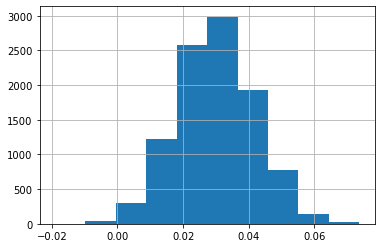

In [22]:
plt.grid(True)
plt.hist(diffs);

In [26]:
diffs = np.array(diffs)
null_values = np.random.normal(0, diffs.std(), diffs.size)

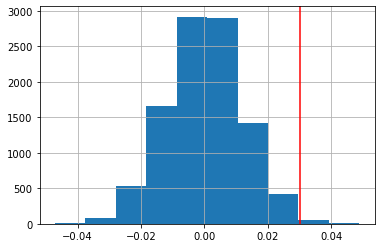

In [30]:
plt.grid(True)
plt.hist(null_values)
plt.axvline(x=ctr_diff, color='r');

In [33]:
(null_values > ctr_diff).mean()

0.0058

In [ ]:
# p-value less than 0.05, therefore there is strong evidence that we can reject our null-hypothesis